# Project 3 API and NLP with Relationship and Dating Subreddits

## Imports

In [6]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import json

from bs4 import BeautifulSoup

import time

import regex as re

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words

from sklearn import preprocessing

from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import confusion_matrix

#from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tringuyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
url = 'https://api.pushshift.io/reddit/search/submission'

## Relationship Advice Subreddit Gathering

In [4]:
params = {
    'subreddit': 'relationship_advice',
    'size':1000,
}
res = requests.get(url, params)
res.status_code

200

In [7]:
json.loads(res.text)

{'data': [{'all_awardings': [],
   'allow_live_comments': False,
   'author': 'ThrowRA-NAFAMZ',
   'author_flair_css_class': None,
   'author_flair_richtext': [],
   'author_flair_text': None,
   'author_flair_type': 'text',
   'author_fullname': 't2_5mc34od5',
   'author_patreon_flair': False,
   'author_premium': False,
   'awarders': [],
   'can_mod_post': False,
   'contest_mode': False,
   'created_utc': 1581021154,
   'domain': 'self.relationship_advice',
   'full_link': 'https://www.reddit.com/r/relationship_advice/comments/ezyji9/i_27f_met_my_best_friends_28m_friend_28m_a_few/',
   'gildings': {},
   'id': 'ezyji9',
   'is_crosspostable': True,
   'is_meta': False,
   'is_original_content': False,
   'is_reddit_media_domain': False,
   'is_robot_indexable': True,
   'is_self': True,
   'is_video': False,
   'link_flair_background_color': '',
   'link_flair_richtext': [],
   'link_flair_text_color': 'dark',
   'link_flair_type': 'text',
   'locked': False,
   'media_only': False

In [4]:
data = res.json()
posts = data['data']
len(posts)

1000

In [5]:
df_rel = pd.DataFrame(posts)
df_rel=df_rel[['subreddit','title','selftext']]
df_rel

subreddit                                              title  \
0    relationship_advice  I’m (19F) getting to breaking point with tryin...   
1    relationship_advice  Found my cheating ex-girlfriend’s profile on a...   
2    relationship_advice  My(23f) best friend(25f) is jealous of my son(...   
3    relationship_advice  I asked him about his sex life and he got offe...   
4    relationship_advice  My long distance boy friend wants to wait a ye...   
..                   ...                                                ...   
995  relationship_advice                   Should I cut off a toxic friend?   
996  relationship_advice  What questions would you ask my (24M) Father (...   
997  relationship_advice  Boyfriend(24M) and I(21F) Broke up, Unsure if ...   
998  relationship_advice  How can I go about telling my [F18] parents ab...   
999  relationship_advice  Help a helpless girl out brothers and sisters....   

                                              selftext  
0    I love my boyfriend so much. We met when I was...  
1                                            [removed]  
2    Since my son was born, my best friend has beco...  
3    So I asked a guy that I’ve been talking to for...  
4    I fell in love with someone. And long story sh...  
..                                                 ...  
995  Ok so this person is a really annoying person....  
996  I'm gonna try to keep this post shot because I...  
997  Okay so, He May actually see this, which would...  
998  The biggest reason I'm hesitant is because I g...  
999  Really not sure what I can do now other than j...  

[1000 rows x 3 columns]

In [73]:
df_rel.to_csv('../datasets/rel.csv',index=False)

## Dating Advice Subreddit Gathering

In [6]:
params_2 = {
    'subreddit': 'dating_advice',
    'size':1000,
}
res_2 = res = requests.get(url, params_2)
res_2.status_code

200

In [7]:
data_2 = res_2.json()
posts_2 = data_2['data']
len(posts_2)

1000

In [8]:
df_dat = pd.DataFrame(posts_2)
df_dat = df_dat[['subreddit','title','selftext',]]
df_dat

subreddit                                              title  \
0    dating_advice                           Do I reach out, and how?   
1    dating_advice  I don’t know if this girl likes me or not and ...   
2    dating_advice  She (17f) stalked my (17m) twitter and found o...   
3    dating_advice                                     Quick question   
4    dating_advice                        Should I try online dating?   
..             ...                                                ...   
995  dating_advice                          First date kinda nervous.   
996  dating_advice           I met my long term girlfriend on tinder.   
997  dating_advice  How can I stop fear of breaking up with my boy...   
998  dating_advice  Is it weird that I have never been sexually at...   
999  dating_advice                  Scared to date because of my body   

                                              selftext  
0    I (23M) got a bumble account the other day as ...  
1    So I am fairly young (M 14) and I really like ...  
2    Few months ago, I came across a tweet that ins...  
3    So do women like poetry? Because I write poetr...  
4    So I'm 19F, and I've never been in a relations...  
..                                                 ...  
995  Me and this chick have been talking consistent...  
996  She was a flight attendant, native to town. Ru...  
997  We've met for the first time almost one month ...  
998  I'm 21, I don't know why but whenever I have l...  
999  So, I'm a pretty (30) female. But I have the w...  

[1000 rows x 3 columns]

In [72]:
df_dat.to_csv('../datasets/dat.csv',index=False)

## Combine Dataframes

In [9]:
rel_dat = pd.concat([df_rel,df_dat],axis=0,sort=False)
rel_dat.head()

subreddit                                              title  \
0  relationship_advice  I’m (19F) getting to breaking point with tryin...   
1  relationship_advice  Found my cheating ex-girlfriend’s profile on a...   
2  relationship_advice  My(23f) best friend(25f) is jealous of my son(...   
3  relationship_advice  I asked him about his sex life and he got offe...   
4  relationship_advice  My long distance boy friend wants to wait a ye...   

                                            selftext  
0  I love my boyfriend so much. We met when I was...  
1                                          [removed]  
2  Since my son was born, my best friend has beco...  
3  So I asked a guy that I’ve been talking to for...  
4  I fell in love with someone. And long story sh...

In [10]:
rel_dat['subreddit'].value_counts()

dating_advice          1000
relationship_advice    1000
Name: subreddit, dtype: int64

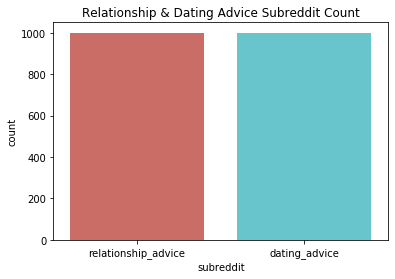

In [11]:
sns.countplot(x=rel_dat['subreddit'], data=rel_dat, palette='hls')
plt.title('Relationship & Dating Advice Subreddit Count'),
# plt.xlabel(map({0:'dating_advice',1:'relationship_advice'}),
plt.show()
# plt.savefig('count_plot')

In [12]:
# df['label'] = df['label'].map({'ham': 0, 'spam': 1})
# df.head()
rel_dat['subreddit']=rel_dat['subreddit'].map({'dating_advice':0,'relationship_advice':1})
rel_dat.head()

subreddit                                              title  \
0          1  I’m (19F) getting to breaking point with tryin...   
1          1  Found my cheating ex-girlfriend’s profile on a...   
2          1  My(23f) best friend(25f) is jealous of my son(...   
3          1  I asked him about his sex life and he got offe...   
4          1  My long distance boy friend wants to wait a ye...   

                                            selftext  
0  I love my boyfriend so much. We met when I was...  
1                                          [removed]  
2  Since my son was born, my best friend has beco...  
3  So I asked a guy that I’ve been talking to for...  
4  I fell in love with someone. And long story sh...

## Combine title and selftext to increase accuracy

In [13]:
rel_dat['title_selftext']= rel_dat['title']+ ' ' +rel_dat['selftext']
rel_dat.head()

subreddit                                              title  \
0          1  I’m (19F) getting to breaking point with tryin...   
1          1  Found my cheating ex-girlfriend’s profile on a...   
2          1  My(23f) best friend(25f) is jealous of my son(...   
3          1  I asked him about his sex life and he got offe...   
4          1  My long distance boy friend wants to wait a ye...   

                                            selftext  \
0  I love my boyfriend so much. We met when I was...   
1                                          [removed]   
2  Since my son was born, my best friend has beco...   
3  So I asked a guy that I’ve been talking to for...   
4  I fell in love with someone. And long story sh...   

                                      title_selftext  
0  I’m (19F) getting to breaking point with tryin...  
1  Found my cheating ex-girlfriend’s profile on a...  
2  My(23f) best friend(25f) is jealous of my son(...  
3  I asked him about his sex life and he got offe...  
4  My long distance boy friend wants to wait a ye...

## NLP

In [14]:
rel_dat.isnull().sum()

subreddit          0
title              0
selftext          25
title_selftext    25
dtype: int64

In [15]:
rel_dat.shape

(2000, 4)

In [16]:
rel_dat.dropna(inplace=True)

In [17]:
rel_dat.drop_duplicates()

subreddit                                              title  \
0            1  I’m (19F) getting to breaking point with tryin...   
1            1  Found my cheating ex-girlfriend’s profile on a...   
2            1  My(23f) best friend(25f) is jealous of my son(...   
3            1  I asked him about his sex life and he got offe...   
4            1  My long distance boy friend wants to wait a ye...   
..         ...                                                ...   
995          0                          First date kinda nervous.   
996          0           I met my long term girlfriend on tinder.   
997          0  How can I stop fear of breaking up with my boy...   
998          0  Is it weird that I have never been sexually at...   
999          0                  Scared to date because of my body   

                                              selftext  \
0    I love my boyfriend so much. We met when I was...   
1                                            [removed]   
2    Since my son was born, my best friend has beco...   
3    So I asked a guy that I’ve been talking to for...   
4    I fell in love with someone. And long story sh...   
..                                                 ...   
995  Me and this chick have been talking consistent...   
996  She was a flight attendant, native to town. Ru...   
997  We've met for the first time almost one month ...   
998  I'm 21, I don't know why but whenever I have l...   
999  So, I'm a pretty (30) female. But I have the w...   

                                        title_selftext  
0    I’m (19F) getting to breaking point with tryin...  
1    Found my cheating ex-girlfriend’s profile on a...  
2    My(23f) best friend(25f) is jealous of my son(...  
3    I asked him about his sex life and he got offe...  
4    My long distance boy friend wants to wait a ye...  
..                                                 ...  
995  First date kinda nervous. Me and this chick ha...  
996  I met my long term girlfriend on tinder. She w...  
997  How can I stop fear of breaking up with my boy...  
998  Is it weird that I have never been sexually at...  
999  Scared to date because of my body So, I'm a pr...  

[1969 rows x 4 columns]

In [18]:
rel_dat = rel_dat[~rel_dat['selftext'].isin(['[deleted]','(deleted)'])]

In [19]:
rel_dat = rel_dat[~rel_dat['title'].isin(['[deleted]','(deleted)'])]

In [20]:
rel_dat

subreddit                                              title  \
0            1  I’m (19F) getting to breaking point with tryin...   
1            1  Found my cheating ex-girlfriend’s profile on a...   
2            1  My(23f) best friend(25f) is jealous of my son(...   
3            1  I asked him about his sex life and he got offe...   
4            1  My long distance boy friend wants to wait a ye...   
..         ...                                                ...   
995          0                          First date kinda nervous.   
996          0           I met my long term girlfriend on tinder.   
997          0  How can I stop fear of breaking up with my boy...   
998          0  Is it weird that I have never been sexually at...   
999          0                  Scared to date because of my body   

                                              selftext  \
0    I love my boyfriend so much. We met when I was...   
1                                            [removed]   
2    Since my son was born, my best friend has beco...   
3    So I asked a guy that I’ve been talking to for...   
4    I fell in love with someone. And long story sh...   
..                                                 ...   
995  Me and this chick have been talking consistent...   
996  She was a flight attendant, native to town. Ru...   
997  We've met for the first time almost one month ...   
998  I'm 21, I don't know why but whenever I have l...   
999  So, I'm a pretty (30) female. But I have the w...   

                                        title_selftext  
0    I’m (19F) getting to breaking point with tryin...  
1    Found my cheating ex-girlfriend’s profile on a...  
2    My(23f) best friend(25f) is jealous of my son(...  
3    I asked him about his sex life and he got offe...  
4    My long distance boy friend wants to wait a ye...  
..                                                 ...  
995  First date kinda nervous. Me and this chick ha...  
996  I met my long term girlfriend on tinder. She w...  
997  How can I stop fear of breaking up with my boy...  
998  Is it weird that I have never been sexually at...  
999  Scared to date because of my body So, I'm a pr...  

[1924 rows x 4 columns]

In [21]:
rel_dat.shape

(1924, 4)

In [74]:
rel_dat.to_csv('../datasets/rel_dat.csv',index=False)

## Model Prep: X and y variables

In [22]:
X = rel_dat['selftext']
y = rel_dat['subreddit']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    stratify= y,
                                                    random_state = 42)

## Base Accuracy Score

In [24]:
y.value_counts(normalize=True)

1    0.504678
0    0.495322
Name: subreddit, dtype: float64

In [25]:
WordNetLemmatizer()

<WordNetLemmatizer>

## Checking Words

In [26]:
cvec = CountVectorizer(stop_words='english',
                             max_features=100,
                             min_df=2,
                             max_df= .98,
                             ngram_range=(1,2))

In [27]:
cvec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.98, max_features=100, min_df=2,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [28]:
cvec.transform(X_train)

<1289x100 sparse matrix of type '<class 'numpy.int64'>'
	with 27103 stored elements in Compressed Sparse Row format>

In [29]:
X_train_cv = cvec.transform(X_train)

In [30]:
X_test_cv = cvec.transform(X_test)

In [31]:
X_train_cv.shape

(1289, 100)

In [32]:
type(X_train_cv)

scipy.sparse.csr.csr_matrix

In [33]:
words = pd.DataFrame(
    X_train_cv.todense(),
    columns = cvec.get_feature_names()
)

In [34]:
words.sum().sort_values(ascending=False).head(20)

just            1952
like            1854
don             1356
know            1345
really          1218
time            1202
want            1151
ve              1151
feel             925
said             888
relationship     752
things           742
friends          723
told             660
didn             642
going            608
think            604
day              565
talk             559
girl             552
dtype: int64

## Confusion Matrix Logistic Regression

In [35]:
lr= LogisticRegression()
lr.fit(X_train_cv,y_train)

/Users/tringuyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
pred_lr = lr.predict(X_test_cv)
cm_lr = confusion_matrix(y_test, pred_lr)

In [37]:
cm_lr_df = pd.DataFrame(cm_lr, columns=['Relationship Advice','Dating Advice'],
                     index=['Relationship Advice', 'Dating Advice'])
cm_lr_df

Relationship Advice  Dating Advice
Relationship Advice                  246             69
Dating Advice                         92            228

## Confusion Matrix MultinomialNB

In [38]:
mnb = MultinomialNB()
mnb.fit(X_train_cv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [39]:
pred_mnb = lr.predict(X_test_cv)
cm_mnb = confusion_matrix(y_test, pred_lr)

In [40]:
cm_mnb_df = pd.DataFrame(cm_mnb, columns=['Relationship Advice','Dating Advice'],
                     index=['Relationship Advice', 'Dating Advice'])
cm_mnb_df

Relationship Advice  Dating Advice
Relationship Advice                  246             69
Dating Advice                         92            228

## Pipeline with Logistic Regression

In [41]:
pipe_lr = Pipeline([
    ('cvec', CountVectorizer(stop_words='english',
                             max_features=100,
                             min_df=2,
                             max_df= .98,
                             ngram_range=(1,2))),
    ('lr', LogisticRegression(solver = 'liblinear'))
])

In [42]:
cross_val_score(pipe_lr, X_train, y_train, cv = 3).mean()

0.6632731609475796

In [43]:
pipe_lr.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.98,
                                 max_features=100, min_df=2, ngram_range=(1, 2),
                                 preprocessor=None, stop_words='english',
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                      

In [44]:
pipe_lr.score(X_train,y_train)

0.7377812257564003

In [45]:
pipe_lr.score(X_test,y_test)

0.7464566929133858

## Checking Logistic Regression Model Coefficients

In [46]:
pipe_lr['lr'].coef_

array([[ 1.01352880e-01, -8.65261454e-02, -1.41066449e-01,
         2.24479921e-02, -2.44345857e-01,  1.82643284e-01,
        -1.63573051e-02,  4.50706798e-01, -4.15417450e-01,
         2.75762331e-01,  2.17150579e-01, -4.67183775e-01,
        -5.38417303e-01, -1.16000423e-01,  3.30139912e-02,
        -2.76679563e-01, -9.40235388e-02,  2.36043493e-01,
         1.48589327e-01,  1.28093221e-02,  2.76227509e-02,
         2.50271220e-02,  2.08161296e-01,  7.04439648e-02,
         1.78137407e-01,  2.36387720e-02,  7.51669528e-02,
        -8.08865642e-02,  3.43316965e-01,  1.55180642e-01,
         2.03070850e-01,  4.88901194e-02,  7.46638891e-02,
        -3.57796289e-01, -5.27261092e-02,  8.27933641e-02,
        -1.16798214e-01,  1.55943233e-01, -2.64504928e-01,
        -1.23238456e-01, -1.62422521e-01,  1.51749221e-01,
         3.88187518e-01, -1.20052189e-01, -6.59333306e-02,
         1.14384546e-01,  1.10754765e-01,  3.13234092e-01,
        -1.09405193e-01,  1.68663342e-01,  3.67050843e-0

In [47]:
coef_lr_df = pd.DataFrame(pipe_lr['lr'].coef_,
                          columns=pipe_lr['cvec'].get_feature_names()
                         )

In [48]:
coef_lr_df.T.sort_values(by = 0,ascending=False)

0
thing     0.460615
better    0.450707
help      0.388188
ll        0.367051
feelings  0.343317
...            ...
girl     -0.357796
bit      -0.415417
met      -0.430753
date     -0.467184
dating   -0.538417

[100 rows x 1 columns]

In [49]:
coef_lr_df_top10 = coef_lr_df.T.sort_values(by = 0,ascending=False).head(10)

In [50]:
coef_lr_df_top10

0
thing      0.460615
better     0.450707
help       0.388188
ll         0.367051
feelings   0.343317
life       0.313234
past       0.290857
boyfriend  0.275762
told       0.273785
says       0.270108

In [51]:
coef_lr_df_bot10 = coef_lr_df.T.sort_values(by = 0,ascending=True).head(10)

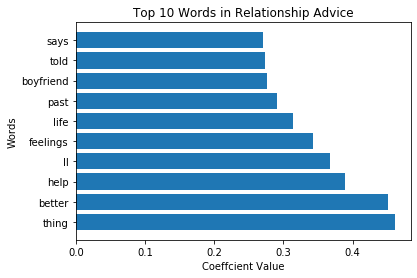

In [98]:
plt.barh(coef_lr_df_top10.index,coef_lr_df_top10[0])
plt.xlabel('Coeffcient Value')
plt.ylabel('Words')
plt.title('Top 10 Words in Relationship Advice')
plt.savefig('../images/Top 10 Relationship Advice Words.png')

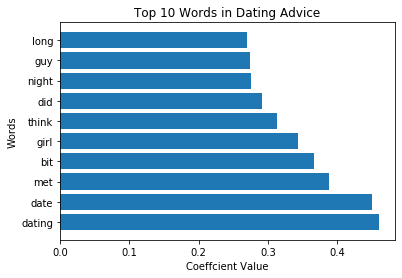

In [84]:
plt.barh(coef_lr_df_bot10.index,coef_lr_df_top10[0])
plt.xlabel('Coeffcient Value')
plt.ylabel('Words')
plt.title('Top 10 Words in Dating Advice')
plt.savefig('../images/Top 10 Dating Advice Words.png')

## Predict Proba

In [85]:
preds = lr.predict(X_test_cv)

In [86]:
confusion_matrix(y_test, # True values.
                 preds)  # Predicted values.

array([[246,  69],
       [ 92, 228]])

In [87]:
#predict probas, graph it out, model.predict test, take one column
pipe_lr.predict_proba(X_train)

array([[0.08348061, 0.91651939],
       [0.60702577, 0.39297423],
       [0.52305912, 0.47694088],
       ...,
       [0.53045094, 0.46954906],
       [0.53401659, 0.46598341],
       [0.4790865 , 0.5209135 ]])

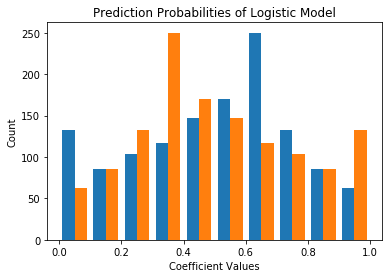

In [115]:
plt.hist(pipe_lr.predict_proba(X_train))
plt.xlabel('Coefficient Values')
plt.ylabel('Count')
plt.title('Prediction Probabilities of Logistic Model')
plt.savefig('../images/Prediction Probabilities of Logistic Model.png')

In [99]:
pipe_lr.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.98,
                                 max_features=100, min_df=2, ngram_range=(1, 2),
                                 preprocessor=None, stop_words='english',
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn'

In [100]:
pipe_params = {
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}

In [91]:
gs = GridSearchCV(pipe_lr, # what object are we optimizing?
                  pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [92]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.98,
                                                        max_features=100,
                                                        min_df=2,
                                                        ngram_range=(1, 2),
                                            

In [93]:
gs.best_score_

0.7284716834755625

## Pipeline with MultinomialNB

In [94]:
pipe_mnb = Pipeline([
    ('cvec', CountVectorizer(stop_words='english',
                             max_features=100,
                             min_df=2,
                             max_df= .98,
                             ngram_range=(1,2))),
    ('mnb', MultinomialNB())
])

In [95]:
pipe_mnb.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.98,
                                 max_features=100, min_df=2, ngram_range=(1, 2),
                                 preprocessor=None, stop_words='english',
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('mnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [96]:
pipe_mnb.score(X_train,y_train)

0.6819239720713731

In [97]:
pipe_mnb.score(X_test,y_test)

0.7149606299212599

In [102]:
pipe_mnb.predict_proba(X_train)

array([[0.0015142 , 0.9984858 ],
       [0.49495733, 0.50504267],
       [0.74480334, 0.25519666],
       ...,
       [0.9072031 , 0.0927969 ],
       [0.57145818, 0.42854182],
       [0.31484222, 0.68515778]])

In [112]:
preds = mnb.predict(X_test_cv)

In [113]:
pipe_mnb.predict_proba(X_train)

array([[0.0015142 , 0.9984858 ],
       [0.49495733, 0.50504267],
       [0.74480334, 0.25519666],
       ...,
       [0.9072031 , 0.0927969 ],
       [0.57145818, 0.42854182],
       [0.31484222, 0.68515778]])

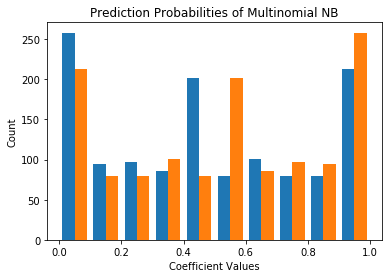

In [116]:
plt.hist(pipe_mnb.predict_proba(X_train))
plt.xlabel('Coefficient Values')
plt.ylabel('Count')
plt.title('Prediction Probabilities of Multinomial NB')
plt.savefig('../images/Prediction Probabitlities of Multinomial NB.png')